<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab10_Image_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task1**: Effect of binary opening and closing

In [ ]:
#necessary imports
import cv2
import numpy as np
from PIL import Image, ImageFilter

#Erosion: Uses a structuring element (kernel) for probing and reducing the shapes in the input image
def erosion(input, size = 3, iterations = 2):
    # kernel which acts as a structuring element to probe or interect wih input image
    kernel = np.ones((size, size), np.uint8)
    # perform erosion with opencv inbuilt function
    img_erode = cv2.erode(input, kernel, iterations)
    return img_erode

#Dilation: Uses a structuring element (kernel) for probing and expanding the shapes in the input image
def dilation(input, size = 3, iterations = 2):
    # kernel which acts as a structuring element to probe or interect wih input image
    kernel = np.ones((size, size), np.uint8)
    # perform dilation with opencv inbuilt function
    img_dilate = cv2.dilate(input, kernel, iterations)
    return img_dilate

#Opening: removes small objects from the foreground, placing them in the background
def opening(input, size = 3, iterations = 2):
    # perform the erosion and dilation with same kernel and iteration iterations
    img_open = dilation(erosion(input, size, iterations),  size, iterations)
    return img_open

#Closing: removes small holes in the foreground, changing small islands of background into foreground
def closing(input, size = 3, iterations = 2):
    # perform the erosion and dilation with same kernel and iteration iterations
    img_close = erosion(dilation(input, size, iterations),  size, iterations)
    return img_close

#input image
input =  cv2.imread('task1.PNG')
#store outputs in respective variables
output1 = erosion(input)
output2 = dilation(input)
output3 = opening(input)
output4 = closing(input)

cv2.destroyAllWindows()


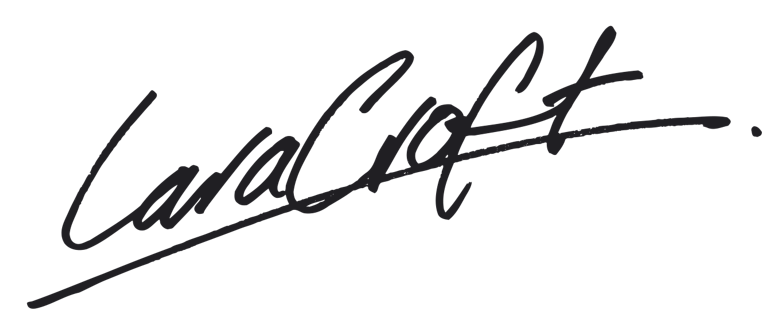

In [ ]:
Image.fromarray(input)

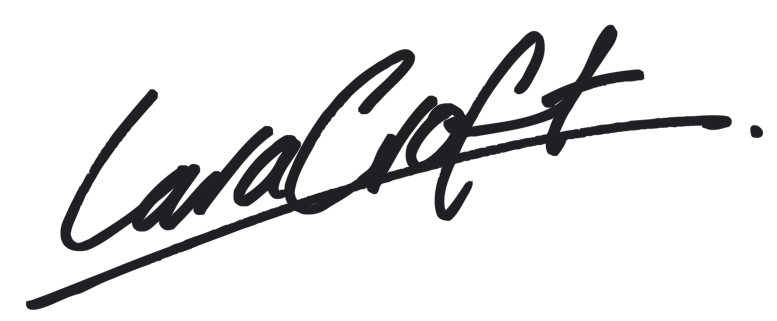

In [ ]:
Image.fromarray(output1)

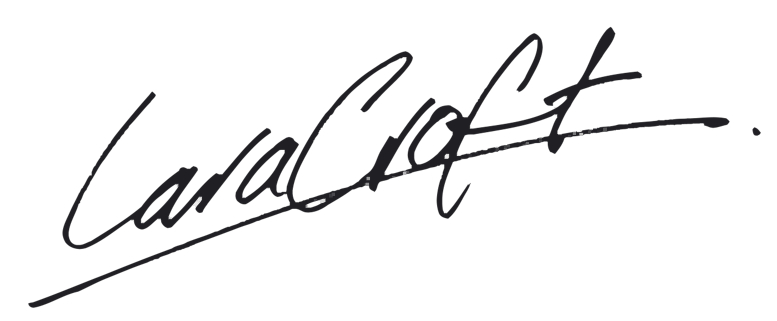

In [ ]:
Image.fromarray(output2)

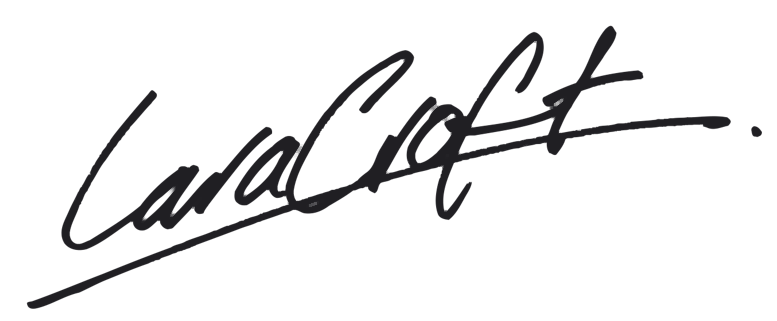

In [ ]:
Image.fromarray(output3)

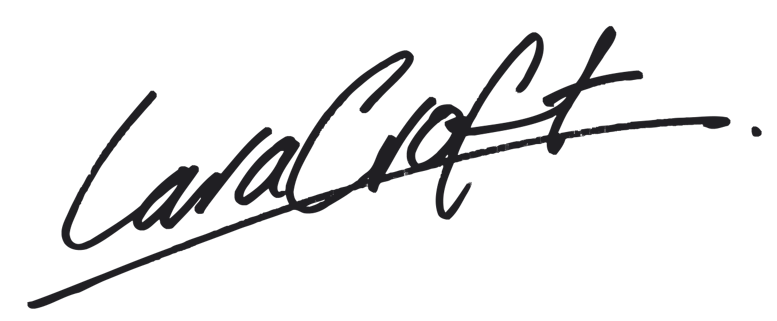

In [ ]:
Image.fromarray(output4)

## **Task 2**: Application: Segment foreground Urdu characters 

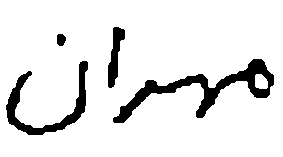

In [ ]:
#input second image and convert to grayscale
input2 =  Image.open('task2.jpg')

#convert input image to grayscale and then to numpy array
input2_gs = np.asarray(input2.convert('L'))

#perform thresholding to remove horizontal and vertical lines with 33 (found after intensive testing of hit and miss cases)
inp = np.where(input2_gs < 33, 0, 255).astype(np.uint8)

#perform erosion first and then opening with particular size also obtained with testing
output6 = opening(erosion(inp, size = 5), size = 7)

#apply median filter to smooth out the rough edges and dsiplay output
Image.fromarray(output6).filter(ImageFilter.ModeFilter(size=3)) 

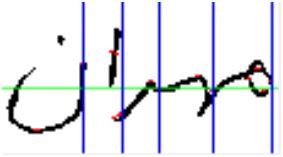

In [ ]:
input2